In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [111]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [113]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

In [114]:
def grop_number (id):
  group = id.split('_')[0]
  return group

train_df["Groupname"] = train_df["PassengerId"].apply(grop_number)
test_df["Groupname"]   = test_df["PassengerId"].apply(grop_number)

In [115]:
train_df.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)

In [116]:
train_df["Groupname"] = train_df["Groupname"].astype("int64")
test_df["Groupname"] = test_df["Groupname"].astype("int64")

In [117]:
def AgeGroup (age) :
  if (not pd.isnull(age)) :
    if (age <= 5):
      return "Baby"
    elif (age <= 12):
      return "Child"
    elif age <= 18 :
      return "Teen"
    elif age <= 50 :
      return "Adult"
    else :
      return "Elderly"
  else :
    return "Baby"


train_df["AgeGroup"] = train_df["Age"].apply(AgeGroup)
test_df ["AgeGroup"] = test_df["Age"].apply(AgeGroup)


In [118]:
train_df['TotalCosts'] = train_df['RoomService']  + train_df['FoodCourt']  + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalCosts'] = test_df['RoomService']  + test_df['FoodCourt']  + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [119]:
numerical_cols = train_df.select_dtypes(include=['int', 'float']).columns
categorical_cols = train_df.select_dtypes(include='object').columns

In [120]:
print(len(train_df.columns))
print(len(numerical_cols))
print(len(categorical_cols))

17
8
8


In [121]:
numerical_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Groupname', 'TotalCosts'],
      dtype='object')

In [122]:
for category in categorical_cols:
    print(category, ": ", len(train_df[category].unique().tolist()))

HomePlanet :  4
CryoSleep :  3
Destination :  4
VIP :  3
Deck :  9
Num :  1818
Side :  3
AgeGroup :  5


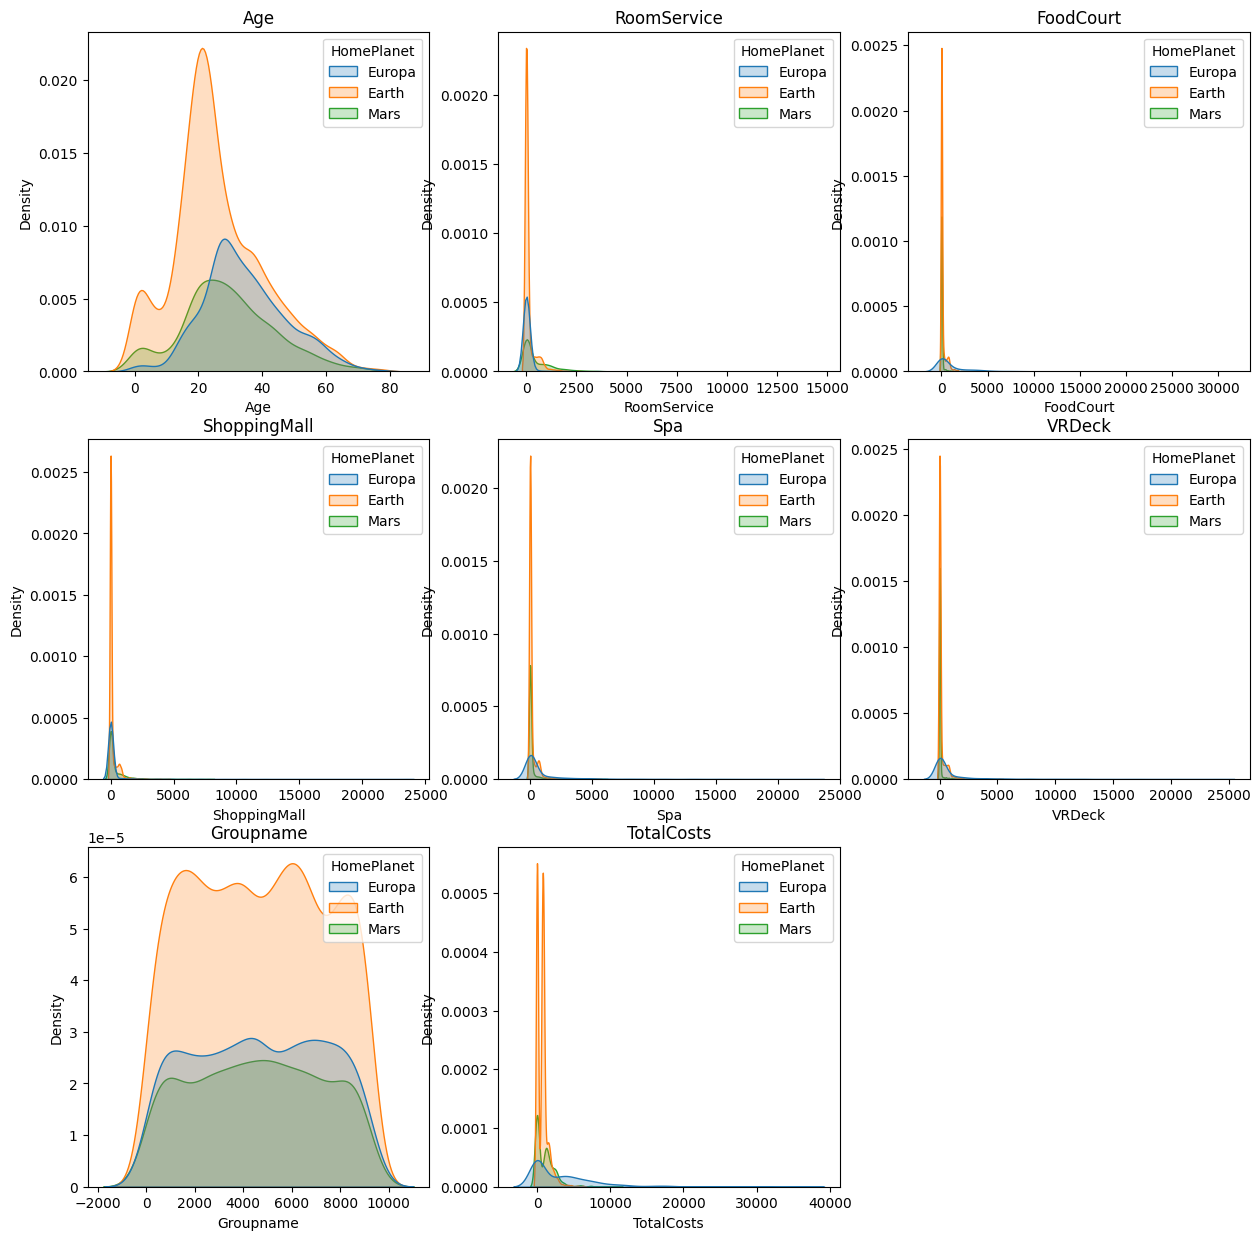

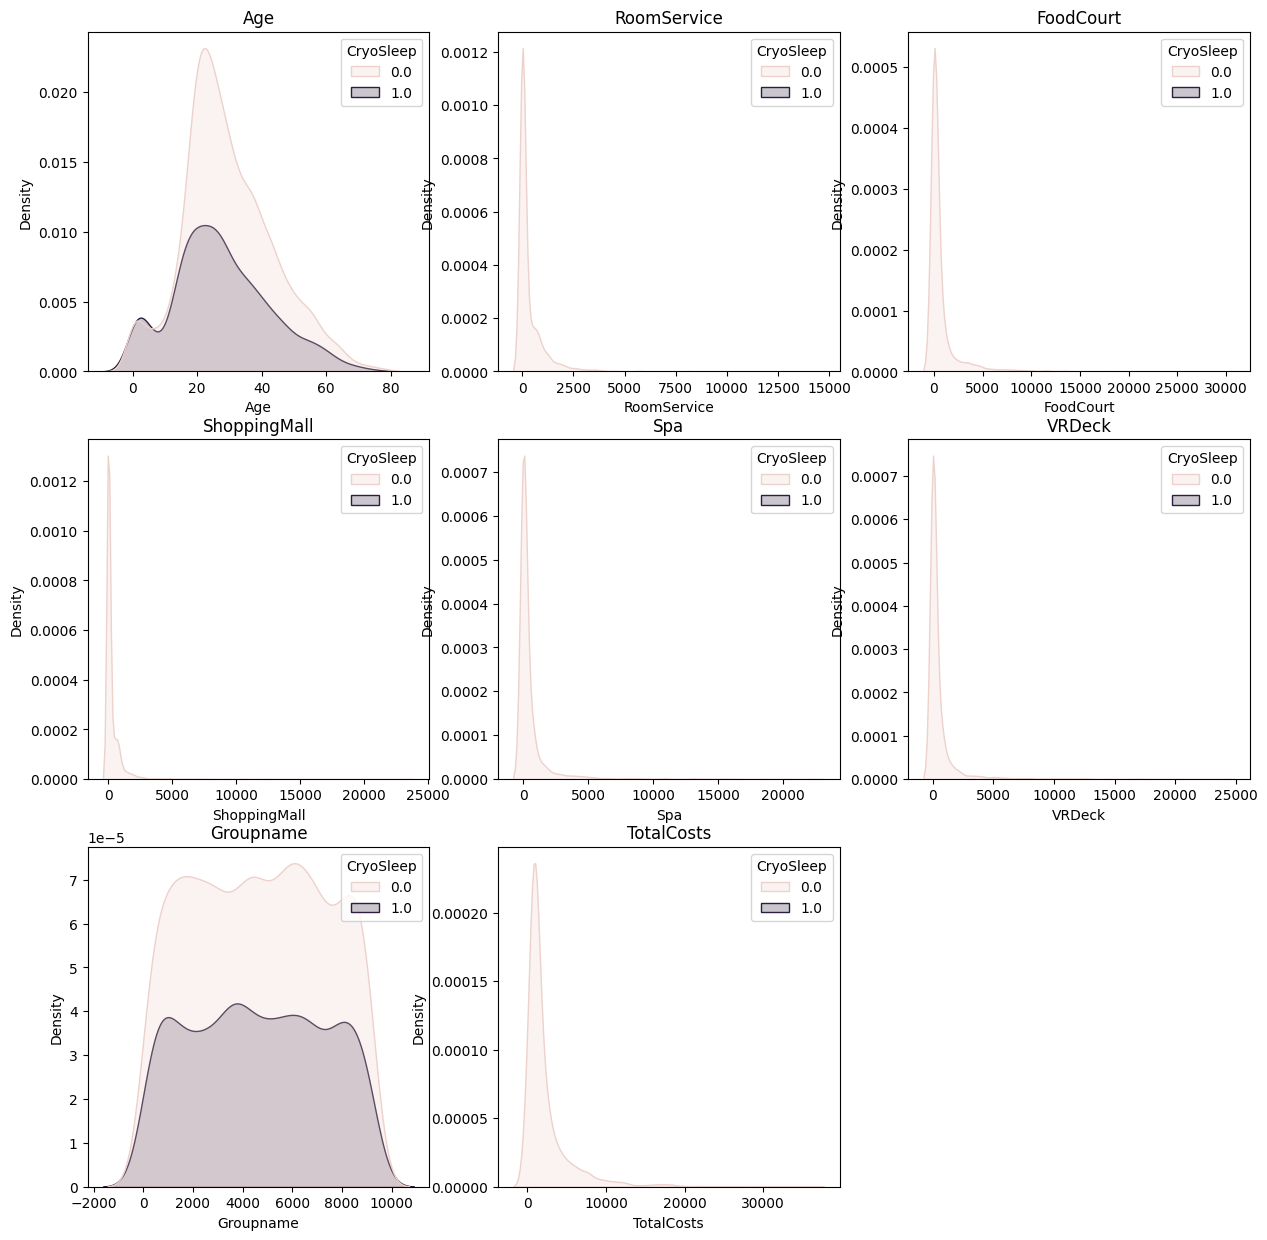

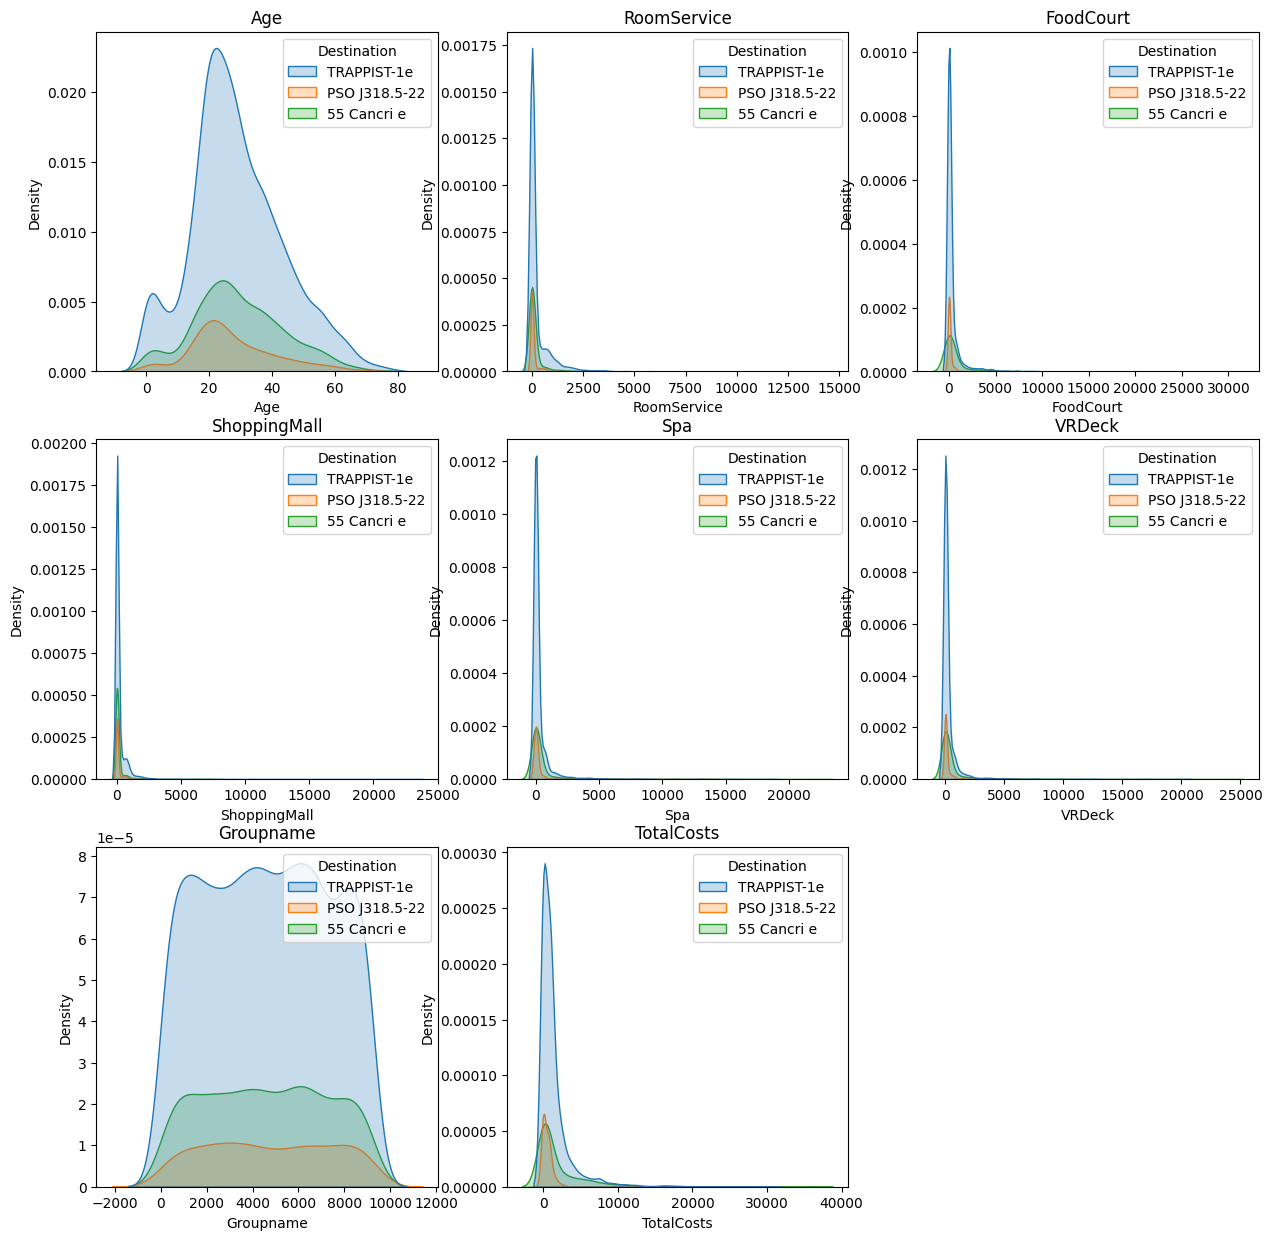

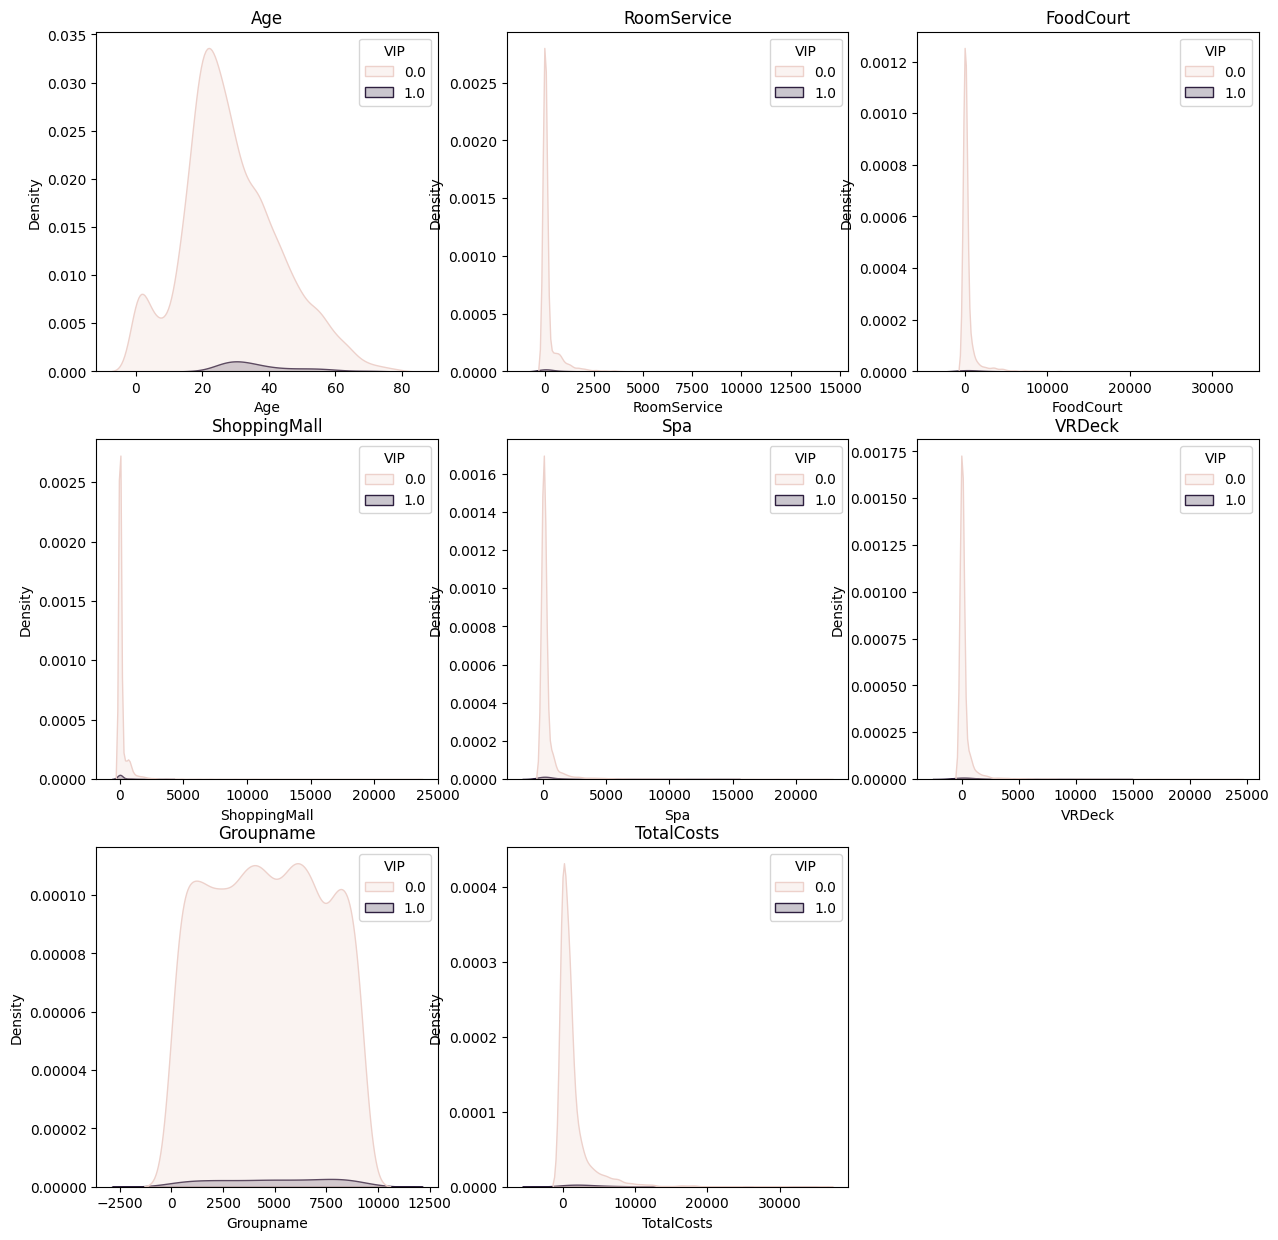

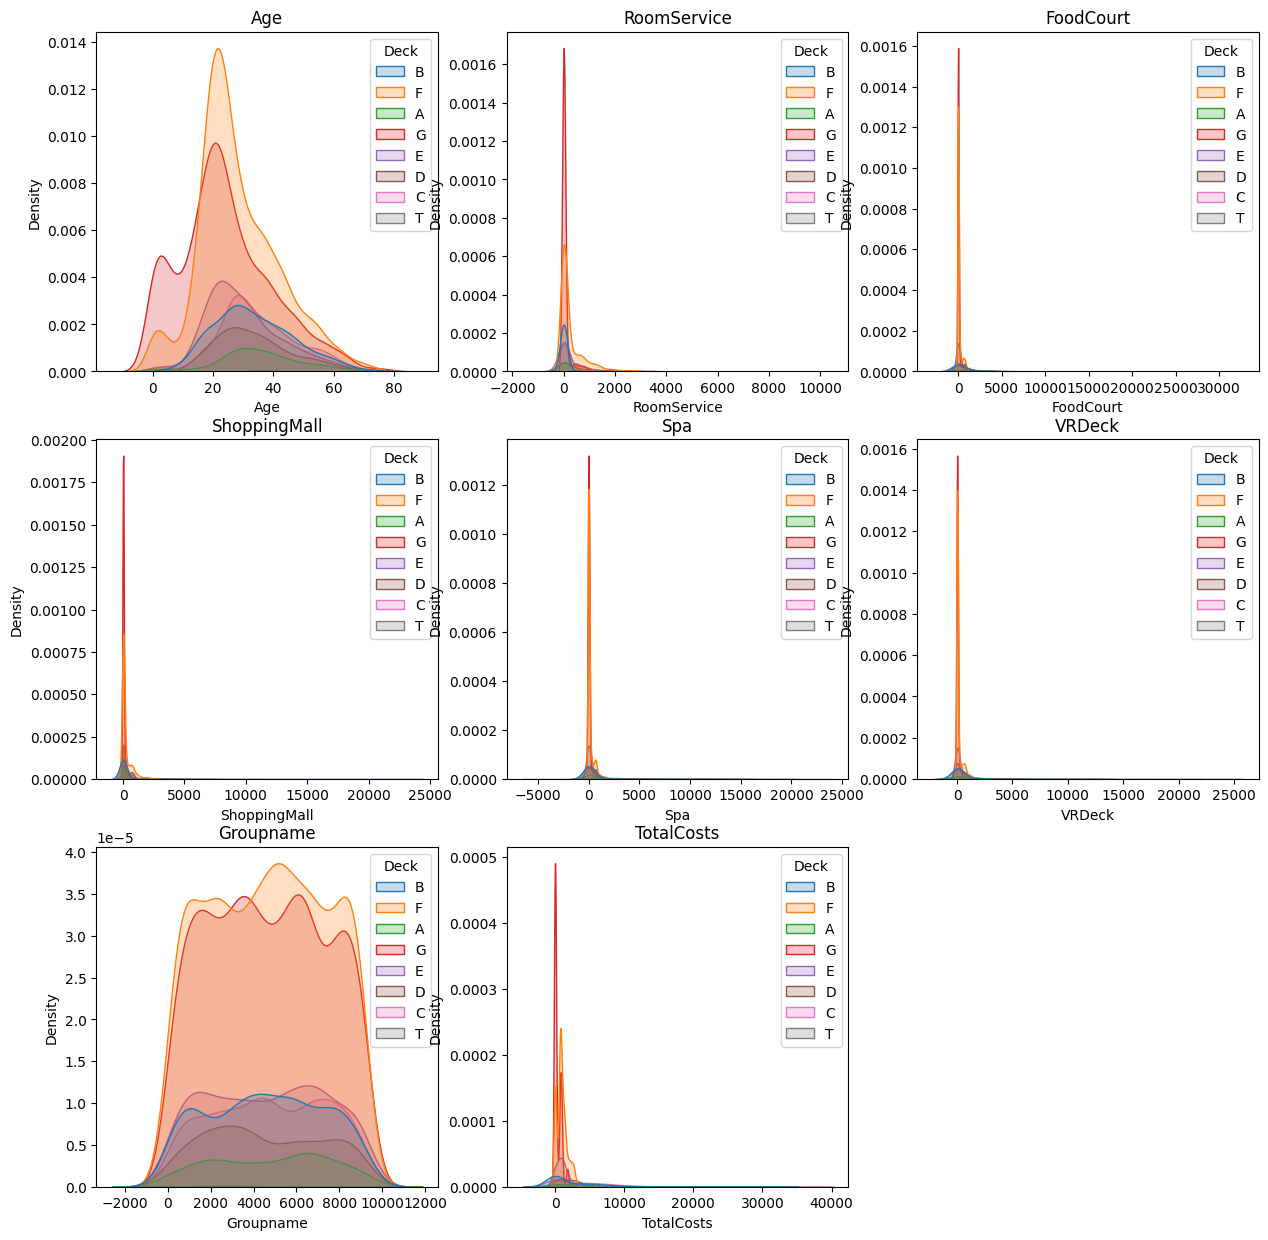

<Figure size 1500x1500 with 0 Axes>

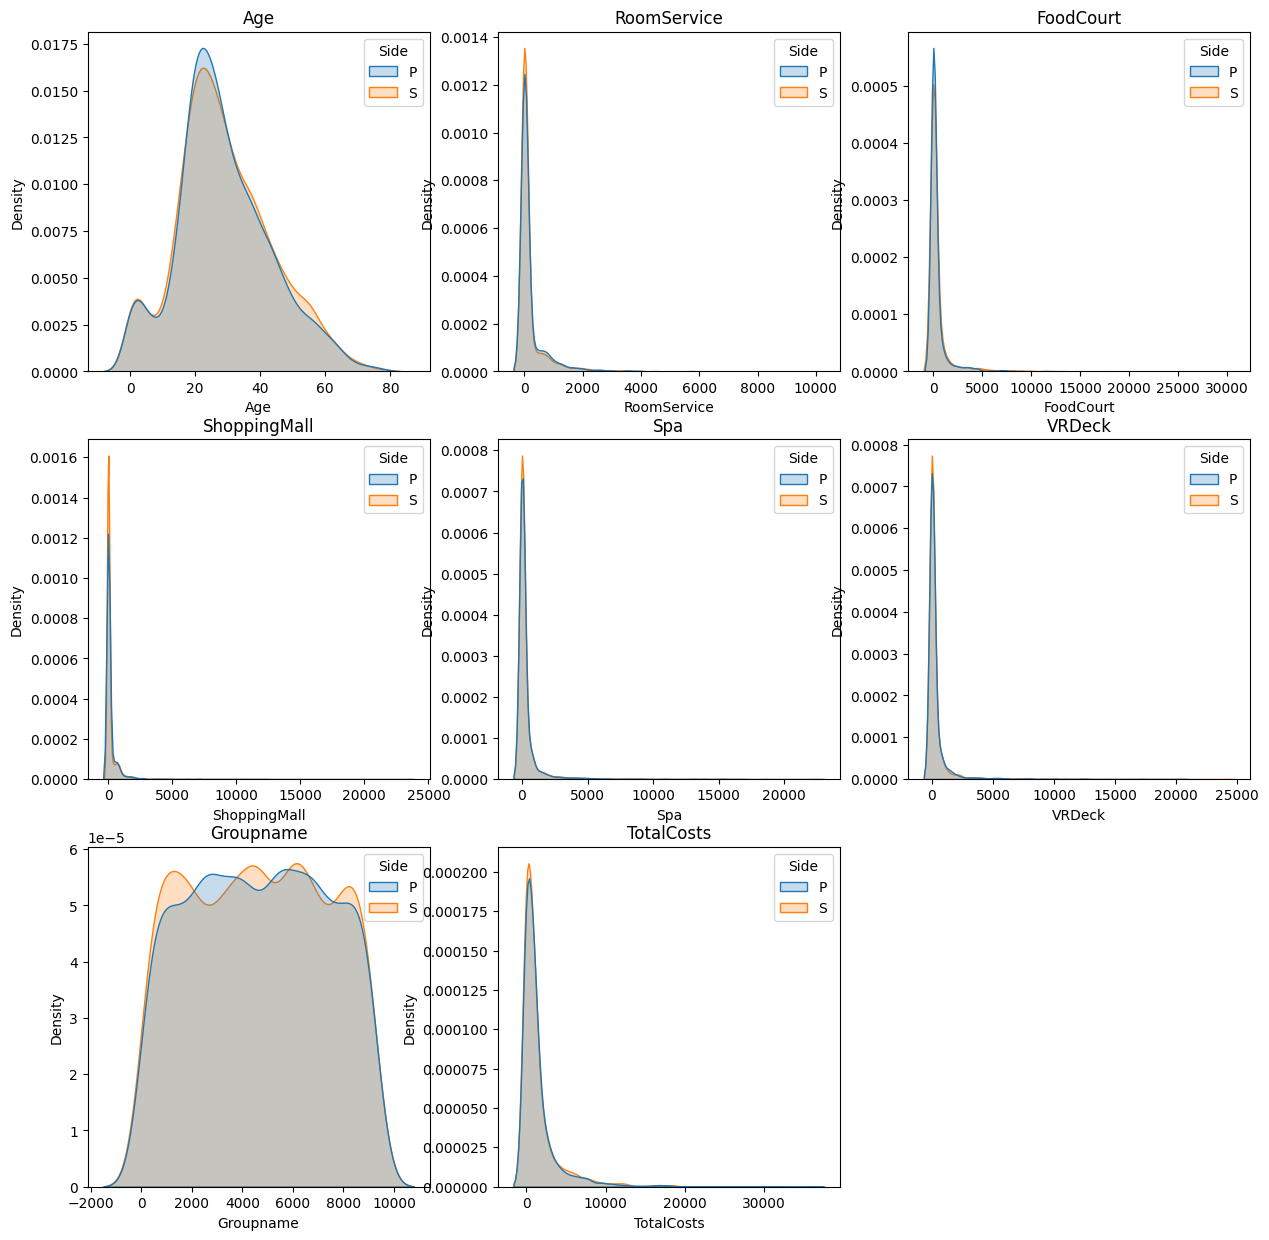

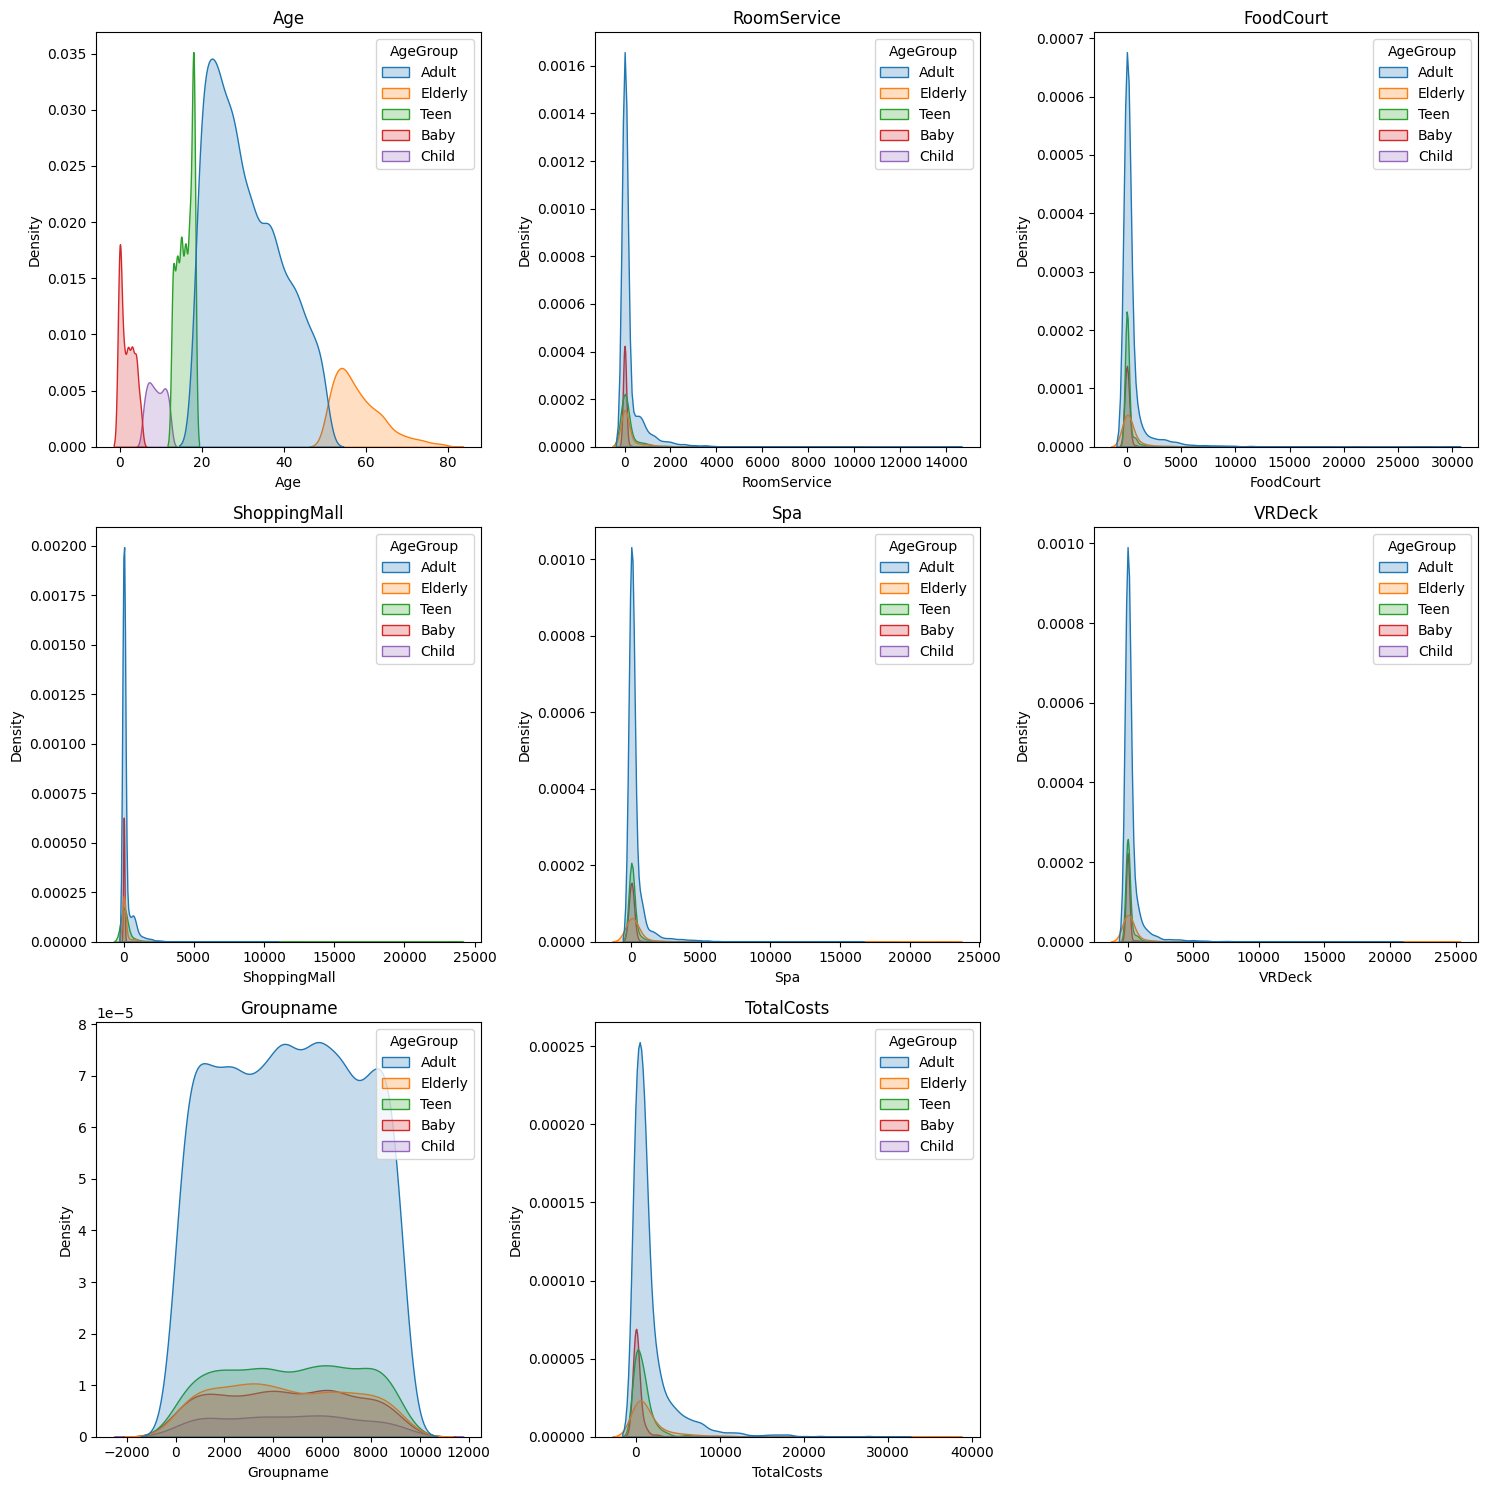

In [123]:
for category in categorical_cols:
    plt.figure(figsize=(15, 15))
    if category != 'Num':
        for ax, col in enumerate(numerical_cols):
                plt.subplot(3, 3, ax + 1)
                plt.title(col)
                sns.kdeplot(x = train_df[col], shade = True, hue=train_df[category])
plt.tight_layout()

In [124]:
train_df[numerical_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,TotalCosts
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,2,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,4,1091.0
...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,9276,8536.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,9278,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,9279,1873.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,9280,4637.0


In [125]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Groupname,8693.0,4633.389624,2671.028856,1.0,2319.0,4630.0,6883.0,9280.0
TotalCosts,7785.0,1484.601541,2845.288241,0.0,0.0,736.0,1486.0,35987.0


In [126]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0
Groupname,4277.0,4639.296469,2716.197368,13.0,2249.0,4639.0,7030.0,9277.0
TotalCosts,3822.0,1441.711931,2828.574635,0.0,0.0,721.5,1449.0,33666.0


In [127]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [128]:
imputer = SimpleImputer()
train_df[numerical_cols] = imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = imputer.transform(test_df[numerical_cols])

In [129]:
scaler = MinMaxScaler()
scaler.fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [130]:
categorical_cols

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side',
       'AgeGroup'],
      dtype='object')

In [131]:
encoder = LabelEncoder()
for category in categorical_cols:
    train_df[category].fillna(value=train_df[category].mode().iloc[0], inplace=True)
    test_df[category].fillna(value=train_df[category].mode().iloc[0], inplace=True)
    train_df[category] = encoder.fit_transform(train_df[category])
    test_df[category] = encoder.fit_transform(test_df[category])

In [132]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.multioutput import MultiOutputClassifier

# Experimental Classifiers
from xgboost import XGBClassifier  # Assuming you have XGBoost installed separately
from sklearn.neighbors import NearestCentroid

In [133]:
input_df = train_df.drop(columns=['Transported'])
target_df = train_df['Transported']

In [134]:
# train terst split
from sklearn.model_selection import train_test_split
train_val_inputs, test_inputs = train_test_split(input_df, test_size=0.2, random_state=42)
train_inputs, val_inputs = train_test_split(train_val_inputs, test_size=0.25, random_state=42)

train_val_target, test_target = train_test_split(target_df, test_size=0.2, random_state=42)
train_target, val_target = train_test_split(train_val_target, test_size=0.25, random_state=42)

In [135]:
models = [
    LogisticRegression(),
    SGDClassifier(),
    SVC(),
    NuSVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    MLPClassifier(),
    RidgeClassifier(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    # MultiOutputClassifier(RandomForestClassifier()),  # Example of MultiOutputClassifier
    XGBClassifier(),
    NearestCentroid(),
]


In [136]:
for model in models:
    model.fit(train_inputs, train_target)
    print(model, ":" , model.score(val_inputs, val_target,))
    print(model, ":" , model.score(test_inputs, test_target,))


LogisticRegression() : 0.7280046003450259
LogisticRegression() : 0.723404255319149
SGDClassifier() : 0.4968372627947096
SGDClassifier() : 0.5077630822311673


SVC() : 0.5296147211040828
SVC() : 0.5296147211040828
NuSVC() : 0.496262219666475
NuSVC() : 0.4744105807935595
LinearSVC() : 0.5313398504887866
LinearSVC() : 0.5388154111558366
KNeighborsClassifier() : 0.5704427832087406
KNeighborsClassifier() : 0.5606670500287522
GaussianNB() : 0.652673950546291
GaussianNB() : 0.652673950546291
MultinomialNB() : 0.7343300747556066
MultinomialNB() : 0.718803910293272
BernoulliNB() : 0.7435307648073606
BernoulliNB() : 0.7406555491661875
DecisionTreeClassifier() : 0.7400805060379528
DecisionTreeClassifier() : 0.7280046003450259
RandomForestClassifier() : 0.7929844738355377
RandomForestClassifier() : 0.7918343875790684
GradientBoostingClassifier() : 0.7998849913743531
GradientBoostingClassifier() : 0.7941345600920069
AdaBoostClassifier() : 0.7929844738355377
AdaBoostClassifier() : 0.7866589994249569
BaggingClassifier() : 0.7780333525014376
BaggingClassifier() : 0.7625071880391029
MLPClassifier() : 0.7050028752156412
MLPClassifier() : 0.7038527889591719
Ri

In [139]:
from sklearn.ensemble import VotingClassifier

named_models = [('model{}'.format(i), model) for i, model in enumerate(models)]
voting_classifier = VotingClassifier(estimators=named_models, voting='hard')
voting_classifier.fit(input_df, target_df)


# Evaluate the ensemble model
print('Ensemble Model Accuracy:', voting_classifier.score(val_inputs, val_target))

Ensemble Model Accuracy: 0.8504887866589994


In [138]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

In [140]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

pred = loaded_model.predict(test_df)

In [142]:
sub_df = pd.DataFrame(pred, columns=["Transported"])
pass_df = pd.read_csv("data/test.csv")['PassengerId']
concatenated_df = pd.concat([pass_df, sub_df], axis=1)
concatenated_df.to_csv("submissions.csv", index=False)